In [1]:
%load_ext autoreload
%autoreload

import io
import os
import sys
import django
import glob
import json
import re
import requests
from IPython.core.debugger import set_trace
from pathlib import Path
from django.core.files.base import ContentFile
from rest_framework import serializers
from tqdm.notebook import tqdm
from google.cloud import vision
from google.cloud import storage
from PIL import Image, ImageSequence
from gensim.models import Doc2Vec
from IPython.core.debugger import set_trace
import IPython
import collections
from googletrans import Translator
from google.cloud import translate_v2 as translate

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)
django.setup()

import getch.models as m
from django.db.models import Q
from django.apps import apps
from django_currentuser.middleware import get_current_user

In [2]:
parentdir

'/Users/quantlab/Documents/GitHub/maskplay'

In [3]:
imgdir = '/Users/quantlab/Documents/모이버/스타일이미지'
sys.path.append(imgdir)

In [4]:
_dir = Path(imgdir) / '러프사이드/2021 ss'
_boo = 257
_text = '@러프사이드 #러프사이드 #rough_side #spring_summer_2021 https://roughside.co.kr/product/list.html?cate_no=24'

In [10]:
for d in tqdm(list(_dir.glob('*'))):
    _fname = d.name.split('==')[1]
    _tags = d.name.split('==')[0]
    _post = m.PostQA.objects.create(boo_id=_boo, text=_text + ' ' + _tags)
    _post.pix.save(_fname, ContentFile(d.read_bytes()), save=True)
    #break

  0%|          | 0/30 [00:00<?, ?it/s]

In [8]:
m.PostQA.objects.last().__dict__

{'_state': <django.db.models.base.ModelState at 0x7ffa521e47c0>,
 'id': 5384,
 'boo_id': 257,
 'text': '@러프사이드 #러프사이드 #rough_side #spring_summer_2021 https://roughside.co.kr/product/list.html?cate_no=24 #아우터 #롱 #후드 #브라운 ##남',
 'created_at': datetime.datetime(2021, 7, 1, 9, 52, 6, 293734),
 'group': None,
 'post_ptr_id': 5384,
 'pix': 'post/2021/7/1/quantlab@kakao.com/2021-07-01_095208.734760__20_shop1_181506.jpg'}

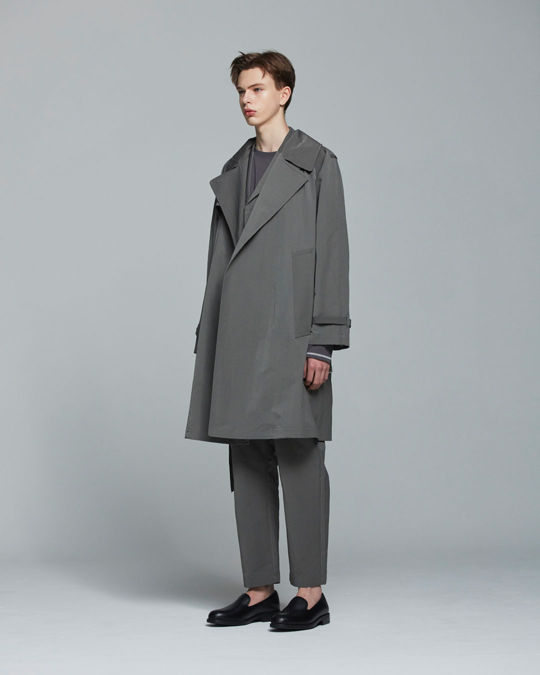

In [30]:
path = _dir / '1_shop1_175955.jpg'
img = Image.open(path)
img.resize((int(img.width / 2), int(img.height / 2)))

In [31]:
def detect_labels(localpath=None, url=None, min_score=None):
    client = vision.ImageAnnotatorClient()

    if localpath:
        with io.open(localpath, 'rb') as image_file:
            content = image_file.read() 

        image = vision.Image(content=content)

    else:
        image = vision.Image()
        image.source.image_uri = url
        
        # 장고 이미지필드의 경우, 아래처럼도 가능
        # image = vision.Image(content=_post.pix.read())
    
    response = client.label_detection(image=image, max_results=50)
    labels = response.label_annotations
    labels = [label.description.lower() for label in labels if label.score>=min_score]
    #labels = [label.description.lower().replace(' ', '_') for label in labels]
    return labels

In [32]:
detect_labels(localpath=path, min_score=0.6)

['suit trousers',
 'arm',
 'dress shirt',
 'sleeve',
 'gesture',
 'collar',
 'grey',
 'suit',
 'fashion design',
 'blazer',
 'formal wear',
 'pocket',
 'electric blue',
 'white-collar worker',
 'event',
 'uniform',
 'knee',
 'street fashion']

In [6]:
list(m.Pix.objects.filter(pick__collection__owner__user__email='magrittelim@gmail.com').values_list('owner__user__email', flat=True))

['magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'magrittelim@gmail.com',
 'kiwi9621@y